<a href="https://colab.research.google.com/github/IbukunOlowo/Recipemania/blob/main/Deep_learning_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import warnings
warnings.filterwarnings('ignore')


import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import cv2
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.model_selection import KFold

In [ ]:
#Load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train Images Shape:       (45000, 32, 32, 3)
Train Labels Shape:       (45000, 1)

Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


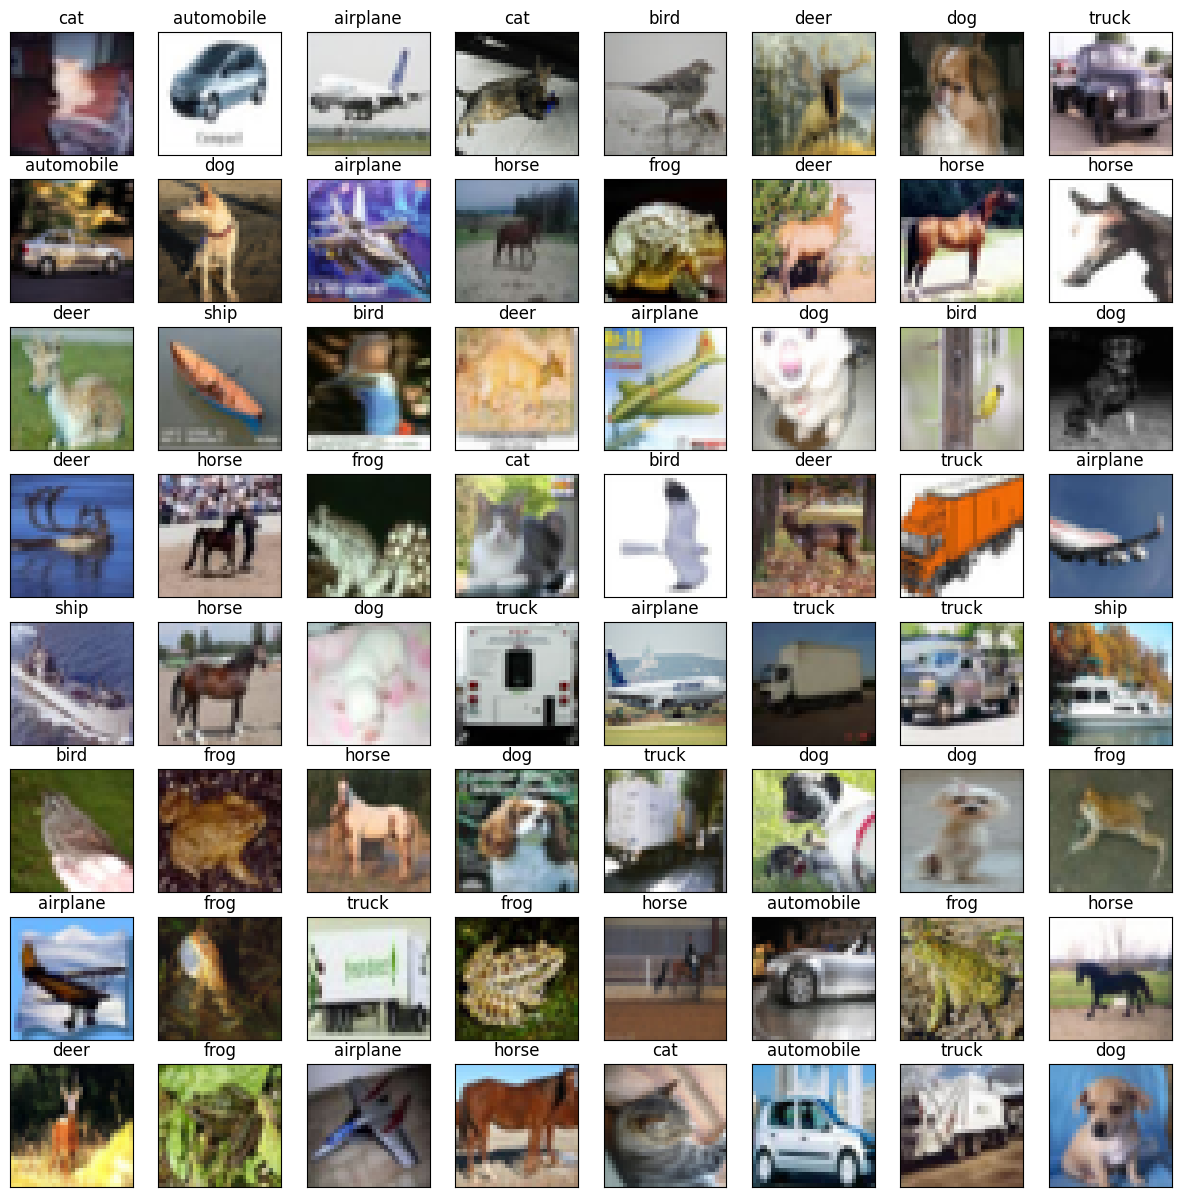

In [ ]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(X_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

Text(0.5, 1.0, 'Class distribution in training set')

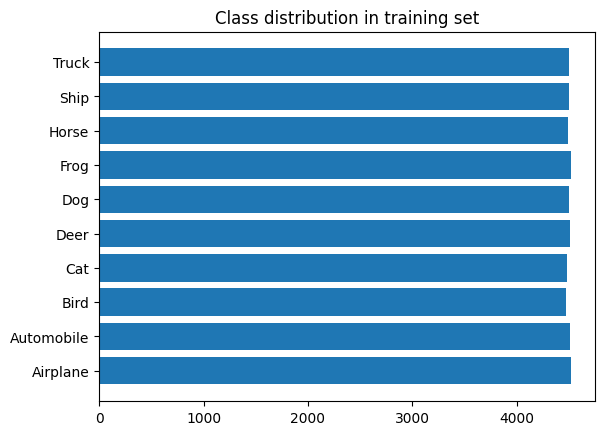

In [ ]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

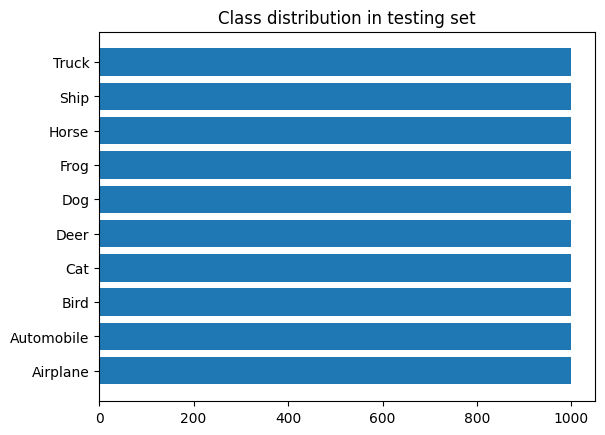

In [ ]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

In [ ]:
# Convert pixel values data type to float32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# Calculate the mean and standard deviation of the training images
mean = np.mean(X_train)
std  = np.std(X_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
X_train = (X_train-mean)/(std+1e-7)
X_test  = (X_test-mean) /(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)


In [ ]:
# Define k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
data_generator = ImageDataGenerator(
    # Rotate images randomly by up to 15 degrees
    rotation_range=15,

    # Shift images horizontally by up to 12% of their width
    width_shift_range=0.12,

    # Shift images vertically by up to 12% of their height
    height_shift_range=0.12,

    # Randomly flip images horizontally
    horizontal_flip=True,

    # Zoom images in by up to 10%
    zoom_range=0.1,

    # Change brightness by up to 10%
    brightness_range=[0.9,1.1],

    # Shear intensity (shear angle in counter-clockwise direction in degrees)
    shear_range=10,

    # Channel shift intensity
    channel_shift_range=0.1,
)



**Baseline CNN**

In [ ]:

# Define input shape and kernel size
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)

# Initialize model
model = Sequential()

# Convolutional layers
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model with metrics
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
#early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
batch_size = 32

train_generator = data_generator.flow(X_train, y_cat_train, batch_size=32)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.3984 - loss: 1.6985 - precision: 0.5696 - recall: 0.2041 - val_accuracy: 0.6171 - val_loss: 1.0755 - val_precision: 0.7167 - val_recall: 0.5180
Epoch 2/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - accuracy: 0.6875 - loss: 0.9745 - precision: 0.7826 - recall: 0.5625 - val_accuracy: 0.6142 - val_loss: 1.0751 - val_precision: 0.7171 - val_recall: 0.5154
Epoch 3/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.6090 - loss: 1.0938 - precision: 0.7452 - recall: 0.4821 - val_accuracy: 0.6922 - val_loss: 0.8783 - val_precision: 0.7753 - val_recall: 0.6142
Epoch 4/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.5000 - loss: 1.0553 - precision: 0.6522 - recall: 0.4688 - val_accuracy: 0.6961 - val_loss: 0.8633 - val_precision: 0.7800 - val_recall: 0.6171
Epoch 5/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.6797 - loss: 0.9109 - precision: 0.7861 - recall: 0.5808 - val_accuracy: 0

313/313 - 1s - 3ms/step - accuracy: 0.8611 - loss: 0.4417 - precision: 0.8854 - recall: 0.8434
✅ Test Accuracy: 0.86
✅ Test Precision: 0.89
✅ Test Recall: 0.84
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
               precision    recall  f1-score   support

    airplane       0.90      0.87      0.88      1000
  automobile       0.94      0.93      0.93      1000
        bird       0.80      0.83      0.81      1000
         cat       0.83      0.65      0.73      1000
        deer       0.85      0.84      0.85      1000
         dog       0.86      0.74      0.79      1000
        frog       0.77      0.95      0.85      1000
       horse       0.88      0.93      0.90      1000
        ship       0.93      0.92      0.92      1000
       truck       0.87      0.95      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



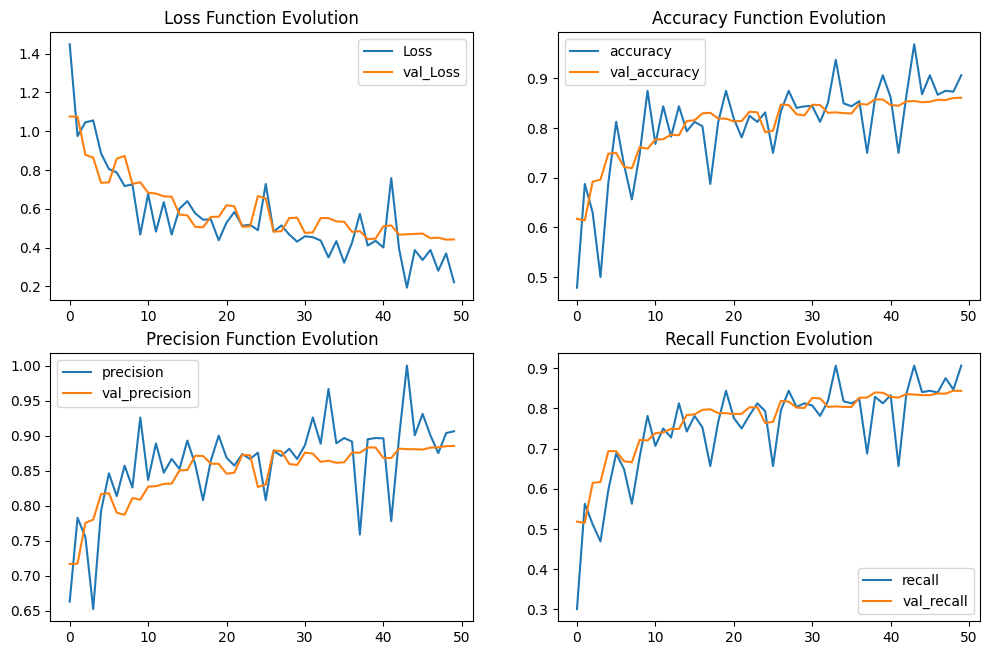

In [ ]:
from sklearn.metrics import classification_report
# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_cat_test, verbose=2)

# Print results
print(f"✅ Test Accuracy: {test_accuracy:.2f}")
print(f"✅ Test Precision: {test_precision:.2f}")
print(f"✅ Test Recall: {test_recall:.2f}")

# Generate predictions for classification report
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Predicted class indices
y_true = np.argmax(y_cat_test, axis=1)   # True class indices

# Classification report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']  # CIFAR-10 classes
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:\n", report)

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


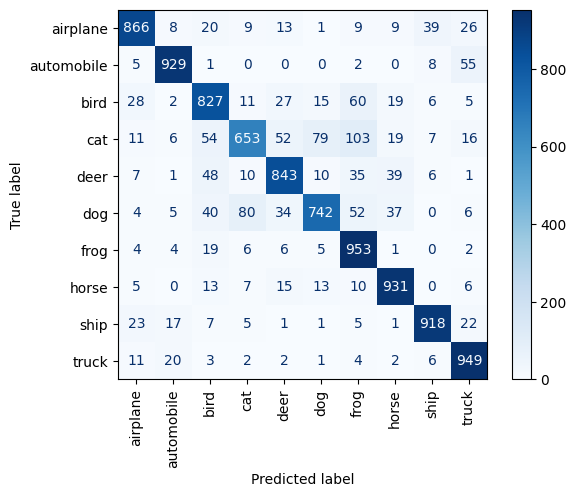

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Predict labels for test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert from one-hot to label index
y_true_classes = y_cat_test.argmax(axis=1)  # Convert true labels to label index

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")
plt.show()

**CNN with Dropout**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))  # Removed redundant input_shape
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))  # Uncomment if desired
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Define metrics
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

# Build the model explicitly (include batch dimension)
model.build(input_shape=(None, 32, 32, 3))  # None is for batch size

# Print model summary
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Example training with Early Stopping
# Replace X_train, y_cat_train with your data
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_cat_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.3397 - loss: 1.8674 - precision: 0.5005 - recall: 0.1298 - val_accuracy: 0.5561 - val_loss: 1.2385 - val_precision: 0.7078 - val_recall: 0.4119
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5489 - loss: 1.2494 - precision: 0.7142 - recall: 0.3786 - val_accuracy: 0.6592 - val_loss: 1.0003 - val_precision: 0.7986 - val_recall: 0.5227
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6437 - loss: 1.0232 - precision: 0.7730 - recall: 0.5092 - val_accuracy: 0.7073 - val_loss: 0.8393 - val_precision: 0.8302 - val_recall: 0.6002
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6917 - loss: 0.8905 - precision: 0.8020 - recall: 0.5844 - val_accuracy: 0.7322 - val_loss: 0.7873 - val_precision: 0.8323 - val_recall: 0.6434
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7267 - loss: 0.7886 - precision: 0.8234 - recall: 0.6328 - val_accuracy: 0.7383 - v

313/313 - 1s - 5ms/step - accuracy: 0.8267 - loss: 0.5497 - precision: 0.8618 - recall: 0.8005
✅ Test Accuracy: 0.83
✅ Test Precision: 0.86
✅ Test Recall: 0.80
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Classification Report:
               precision    recall  f1-score   support

    airplane       0.83      0.86      0.84      1000
  automobile       0.91      0.93      0.92      1000
        bird       0.79      0.72      0.75      1000
         cat       0.66      0.69      0.68      1000
        deer       0.80      0.82      0.81      1000
         dog       0.76      0.71      0.73      1000
        frog       0.84      0.89      0.86      1000
       horse       0.86      0.86      0.86      1000
        ship       0.92      0.88      0.90      1000
       truck       0.91      0.89      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



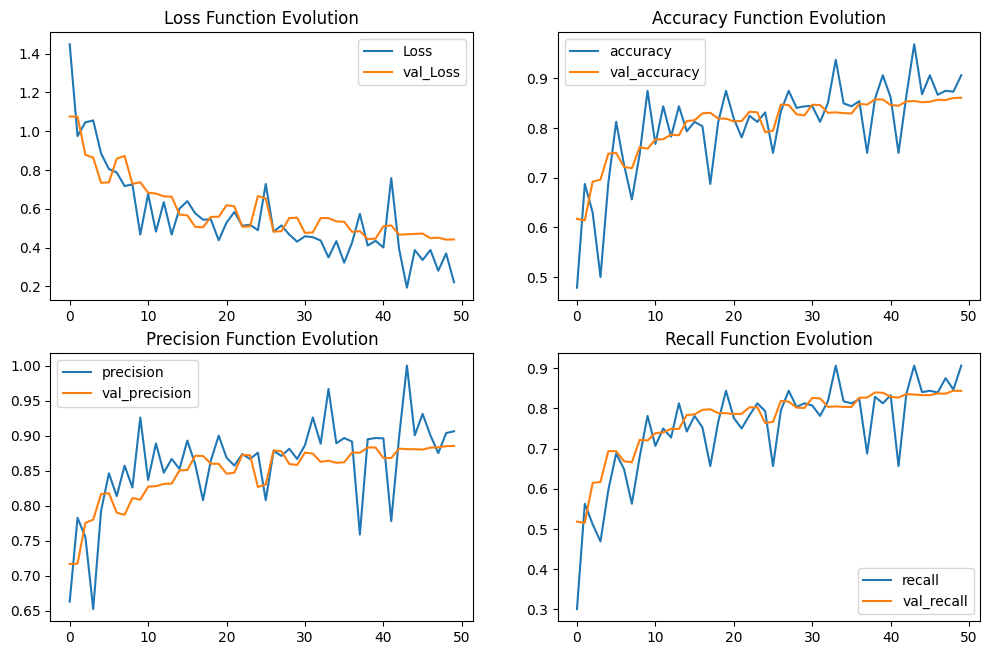

In [ ]:
from sklearn.metrics import classification_report
# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_cat_test, verbose=2)

# Print results
print(f"✅ Test Accuracy: {test_accuracy:.2f}")
print(f"✅ Test Precision: {test_precision:.2f}")
print(f"✅ Test Recall: {test_recall:.2f}")

# Generate predictions for classification report
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Predicted class indices
y_true = np.argmax(y_cat_test, axis=1)   # True class indices

# Classification report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']  # CIFAR-10 classes
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:\n", report)

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

**ResNet**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow.keras.models



resnet_input =  Input((32,32,3))
conv_1 = Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding="valid",strides=2)(resnet_input)


conv_b1_1 = Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding="same")(conv_1)
conv_b1_2 = Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding="same")(conv_b1_1)

sum_1 = Concatenate()([conv_b1_1,conv_b1_2])
avg_1 = AveragePooling2D(pool_size=(2,2))(sum_1)

conv_b2_1 = Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding="same")(avg_1)
conv_b2_2 = Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding="same")(conv_b2_1)

sum_2 = Concatenate()([conv_b2_1,conv_b2_2])
avg_2 = AveragePooling2D(pool_size=(2,2))(sum_2)

conv_b3_1 = Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding="same")(avg_2)
conv_b3_2 = Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding="same")(conv_b3_1)

sum_3 = Concatenate()([conv_b3_1,conv_b3_2])

avg = AveragePooling2D(pool_size=(2,2))(sum_3)
#flat = Flatten()(avg)#problema <--

#dense1 = Dense(1,activation='relu')(avg)#avg

#maxp = AveragePooling2D(pool_size=(4,4))(dense1)#MaxPooling2D

dense2 = Dense(10,activation='softmax')(avg)#maxp


flat = Flatten()(dense2)



resnet_fix = tensorflow.keras.models.Model(inputs=resnet_input,outputs=flat)#flat

In [ ]:
opt_base = tensorflow.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')

opt = tensorflow.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.82,
    beta_2=0.99,
    epsilon=1e-07,
    amsgrad=True,#False
    name='Adam')

opt2 = tensorflow.keras.optimizers.Adam(
    learning_rate=0.0002,
    beta_1=0.93,
    beta_2=0.999,
    epsilon=2e-08,
    amsgrad=True,#False
    name='Adam')


#resnet.compile(loss='categorical_crossentropy',optimizer=opt2,metrics=['accuracy'])
#resnet.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
#resnet.summary()
resnet_fix.compile(loss='categorical_crossentropy',optimizer=opt2,metrics=['accuracy'])
resnet_fix.summary()

Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_70 (Conv2D)        │ (None, 15, 15, 32)     │            896 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_71 (Conv2D)        │ (None, 15, 15, 64)     │         18,496 │ conv2d_70[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_72 (Conv2D)        │ (None, 15, 15, 64)     │         36,928 │ conv2d_71[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_12            │ (None, 15, 15, 128)    │              0 │ conv2d_71[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_72[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_pooling2d_12      │ (None, 7, 7, 128)      │              0 │ concatenate_12[0][0]   │
│ (AveragePooling2D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_73 (Conv2D)        │ (None, 7, 7, 128)      │        147,584 │ average_pooling2d_12[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_74 (Conv2D)        │ (None, 7, 7, 128)      │        147,584 │ conv2d_73[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_13            │ (None, 7, 7, 256)      │              0 │ conv2d_73[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_74[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_pooling2d_13      │ (None, 3, 3, 256)      │              0 │ concatenate_13[0][0]   │
│ (AveragePooling2D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_75 (Conv2D)        │ (None, 3, 3, 256)      │        590,080 │ average_pooling2d_13[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_76 (Conv2D)        │ (None, 3, 3, 256)      │        590,080 │ conv2d_75[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_14            │ (None, 3, 3, 512)      │              0 │ conv2d_75[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_76[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_pooling2d_14      │ (None, 1, 1, 512)      │              0 │ concatenate_14[0][0]   │
│ (AveragePooling2D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 1, 1, 10)       │          5,130 │ average_pooling2d_14[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_11 (Flatten)      │ (None, 10)             │              0 │ dense_18[0][0]         │
└──────────────────────

 Total params: 1,536,778 (5.86 MB)

 Trainable params: 1,536,778 (5.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history1=resnet_fix.fit(X_train,y_cat_train,epochs=20,validation_data=(X_test,y_cat_test))
evaluation = resnet_fix.evaluate(X_test, y_cat_test)
print('Test Accuracy: {}'.format(evaluation[1]))
# Generate predictions
y_pred_prob = resnet_fix.predict(X_test)  # Softmax probabilities
y_pred = np.argmax(y_pred_prob, axis=1)   # Predicted class indices
y_true = np.argmax(y_cat_test, axis=1)    # True class indices



# Classification report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']  # CIFAR-10 classes
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:\n", report)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3332 - loss: 1.8078 - val_accuracy: 0.4998 - val_loss: 1.3846
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5272 - loss: 1.3057 - val_accuracy: 0.5958 - val_loss: 1.1265
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6110 - loss: 1.0926 - val_accuracy: 0.6432 - val_loss: 1.0046
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6658 - loss: 0.9451 - val_accuracy: 0.6683 - val_loss: 0.9383
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7040 - loss: 0.8408 - val_accuracy: 0.6966 - val_loss: 0.8500
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7346 - loss: 0.7466 - val_accuracy: 0.7129 - val_loss: 0.8093
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7643 - loss: 0.6691 - val_accuracy: 0.7330 - val_loss: 0.7742
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7906 - loss: 0.5975 -

In [ ]:
evaluation = resnet_fix.evaluate(X_test, y_cat_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.7758 - loss: 1.0631
Test Accuracy: 0.7712000012397766


**VGG**

In [ ]:
from tensorflow.keras.applications import VGG16

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Freeze the layers of the VGG model
#for layer in vgg_model.layers:
    #layer.trainable = False
# Unfreeze the last 4 layers of VGG16 for fine-tuning
for layer in vgg_model.layers[:-4]:
    layer.trainable = False
for layer in vgg_model.layers[-4:]:
    layer.trainable = True


In [ ]:
# adding the FC layers
# Dense layers
# Create a new model by adding layers on top of VGG
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # To reduce overfitting
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 7,213,322 (27.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

In [ ]:
from sklearn.metrics import classification_report
# Train the model with EarlyStopping
history = model.fit(X_train, y_cat_train,
                    validation_data=(X_test, y_cat_test),
                    epochs=50, batch_size=64,
                    callbacks=[early_stopping])

# Evaluate the model
evaluation = model.evaluate(X_test, y_cat_test, verbose=1)
print('Test Accuracy: {:.4f}'.format(evaluation[1]))

# Generate predictions
y_pred_prob = model.predict(X_test)  # Softmax probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Predicted class indices
y_true = np.argmax(y_cat_test, axis=1)  # True class indices

# Classification report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']  # CIFAR-10 classes
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:\n", report)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4973 - loss: 1.4266 - val_accuracy: 0.6846 - val_loss: 0.9227
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7147 - loss: 0.8473 - val_accuracy: 0.7276 - val_loss: 0.7987
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7577 - loss: 0.7085 - val_accuracy: 0.7299 - val_loss: 0.8078
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7912 - loss: 0.6171 - val_accuracy: 0.7363 - val_loss: 0.7873
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8184 - loss: 0.5358 - val_accuracy: 0.7347 - val_loss: 0.8653
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8431 - loss: 0.4645 - val_accuracy: 0.7429 - val_loss: 0.8241
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8636 - loss: 0.3991 - val_accuracy: 0.7422 - val_loss: 0.8822
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7397 - loss: 0.7922
Test Accuracy: 0.7363
313/31

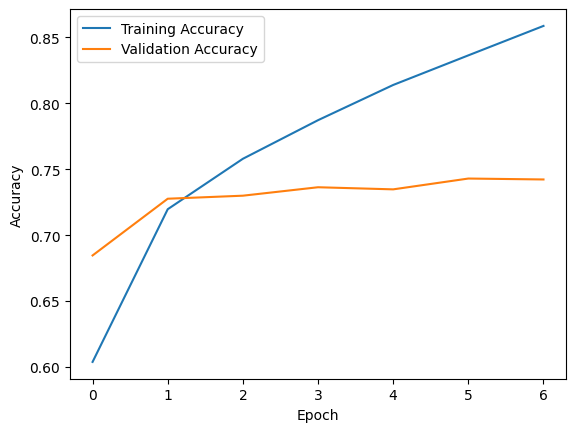

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**ANN**

In [ ]:
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

# Flatten the data for PCA
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Apply PCA with more components
n_components = 200  # Increased from 100
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)
# Print explained variance ratio
print(f"Explained variance ratio (top {n_components} components): {sum(pca.explained_variance_ratio_):.4f}")

# Build a simple ANN with regularization
model = keras.Sequential([
    keras.layers.Input(shape=(n_components,)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

# Compile with tuned optimizer
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train with validation split
model.fit(X_train_pca, y_train, epochs=50, batch_size=64,  # Increased epochs, batch size
          validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
evaluation = model.evaluate(X_test_pca, y_test, verbose=1)
print('Test Accuracy: {:.4f}'.format(evaluation[1]))

# Generate predictions
y_pred_prob = model.predict(X_test_pca)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test.flatten()

# Classification report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:\n", report)

Explained variance ratio (top 200 components): 0.9458
Epoch 1/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2083 - loss: 3.0042 - val_accuracy: 0.3694 - val_loss: 1.8526
Epoch 2/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3093 - loss: 1.9911 - val_accuracy: 0.4039 - val_loss: 1.8173
Epoch 3/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3521 - loss: 1.8405 - val_accuracy: 0.4198 - val_loss: 1.7528
Epoch 4/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3784 - loss: 1.7572 - val_accuracy: 0.4349 - val_loss: 1.6961
Epoch 5/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3959 - loss: 1.7017 - val_accuracy: 0.4518 - val_loss: 1.6502
Epoch 6/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4210 - loss: 1.6410 - val_accuracy: 0.4587 - val_loss: 1.6095
Epoch 7/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4371 - loss: 1.6032 - val_accuracy: 0.4710 - val_loss: 1.5756
Epoch 8/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/st

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, Input, Concatenate, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import tensorflow as tf

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X = np.concatenate((X_train, X_test), axis=0)  # Full dataset: 60,000 images
y = np.concatenate((y_train, y_test), axis=0).flatten()  # Integer labels

# Preprocess data
X = X.astype('float32')
mean = np.mean(X)
std = np.std(X)
X = (X - mean) / (std + 1e-7)  # Normalize as in your original code

# Define k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Data augmentation
data_generator = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.12,
    height_shift_range=0.12,
    horizontal_flip=True,
    zoom_range=0.1,
    brightness_range=[0.9, 1.1],
    shear_range=10,
    channel_shift_range=0.1
)

# Function to perform cross-validation
def cross_validate_model(model_fn, X_data, y_data, epochs, batch_size, use_generator=False, pca=False, n_components=None):
    accuracies = []
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_data), 1):
        print(f"\nFold {fold}/{k}")
        X_train_fold, X_val_fold = X_data[train_idx], X_data[val_idx]
        y_train_fold, y_val_fold = y_data[train_idx], y_data[val_idx]

        # PCA preprocessing if applicable
        if pca:
            X_train_flat = X_train_fold.reshape(X_train_fold.shape[0], -1)
            X_val_flat = X_val_fold.reshape(X_val_fold.shape[0], -1)
            pca_obj = PCA(n_components=n_components)
            X_train_fold = pca_obj.fit_transform(X_train_flat)
            X_val_fold = pca_obj.transform(X_val_flat)
            y_train_cat = y_train_fold  # Integer labels for ANN
            y_val_cat = y_val_fold
        else:
            y_train_cat = to_categorical(y_train_fold, 10)  # One-hot for CNNs
            y_val_cat = to_categorical(y_val_fold, 10)

        # Build model
        model = model_fn()

        # Training
        if use_generator:
            data_generator.fit(X_train_fold)
            train_gen = data_generator.flow(X_train_fold, y_train_cat, batch_size=batch_size)
            steps_per_epoch = len(X_train_fold) // batch_size
            history = model.fit(train_gen, epochs=epochs, steps_per_epoch=steps_per_epoch,
                                validation_data=(X_val_fold, y_val_cat), verbose=1)
        else:
            early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
            history = model.fit(X_train_fold, y_train_cat, epochs=epochs, batch_size=batch_size,
                                validation_data=(X_val_fold, y_val_cat), callbacks=[early_stopping], verbose=1)

        # Evaluate
        loss, acc = model.evaluate(X_val_fold, y_val_cat, verbose=0)
        accuracies.append(acc)
        print(f"Fold {fold} - Accuracy: {acc:.4f}")

    mean_acc = np.mean(accuracies)
    std_acc = np.std(accuracies)
    print(f"\nMean Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
    return mean_acc, std_acc

# 1. Baseline CNN
def build_baseline_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

print("Baseline CNN:")
baseline_acc, baseline_std = cross_validate_model(build_baseline_cnn, X, y, epochs=50, batch_size=32, use_generator=True)

# 2. CNN with Dropout
def build_cnn_dropout():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.25),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

print("\nCNN with Dropout:")
dropout_acc, dropout_std = cross_validate_model(build_cnn_dropout, X, y, epochs=50, batch_size=32, use_generator=True)

# 3. ResNet-inspired CNN
def build_resnet():
    resnet_input = Input((32, 32, 3))
    conv_1 = Conv2D(32, (3, 3), activation='relu', padding="valid", strides=2)(resnet_input)
    conv_b1_1 = Conv2D(64, (3, 3), activation='relu', padding="same")(conv_1)
    conv_b1_2 = Conv2D(64, (3, 3), activation='relu', padding="same")(conv_b1_1)
    sum_1 = Concatenate()([conv_b1_1, conv_b1_2])
    avg_1 = AveragePooling2D(pool_size=(2, 2))(sum_1)
    conv_b2_1 = Conv2D(128, (3, 3), activation='relu', padding="same")(avg_1)
    conv_b2_2 = Conv2D(128, (3, 3), activation='relu', padding="same")(conv_b2_1)
    sum_2 = Concatenate()([conv_b2_1, conv_b2_2])
    avg_2 = AveragePooling2D(pool_size=(2, 2))(sum_2)
    conv_b3_1 = Conv2D(256, (3, 3), activation='relu', padding="same")(avg_2)
    conv_b3_2 = Conv2D(256, (3, 3), activation='relu', padding="same")(conv_b3_1)
    sum_3 = Concatenate()([conv_b3_1, conv_b3_2])
    avg = AveragePooling2D(pool_size=(2, 2))(sum_3)
    dense = Dense(10, activation='softmax')(avg)
    flat = Flatten()(dense)
    model = Model(inputs=resnet_input, outputs=flat)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0002), metrics=['accuracy'])
    return model

print("\nResNet-inspired CNN:")
resnet_acc, resnet_std = cross_validate_model(build_resnet, X, y, epochs=20, batch_size=32, use_generator=True)

# 4. VGG16 with Fine-Tuning
def build_vgg16():
    vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    for layer in vgg_base.layers[:-4]:
        layer.trainable = False
    for layer in vgg_base.layers[-4:]:
        layer.trainable = True
    model = Sequential([
        vgg_base,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

print("\nVGG16 with Fine-Tuning:")
vgg16_acc, vgg16_std = cross_validate_model(build_vgg16, X, y, epochs=50, batch_size=64, use_generator=True)

# 5. ANN with PCA
def build_ann():
    model = Sequential([
        Input(shape=(200,)),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

print("\nANN with PCA (200 components):")
ann_acc, ann_std = cross_validate_model(build_ann, X, y, epochs=50, batch_size=64, pca=True, n_components=200)

# Summary of Results
print("\nCross-Validation Summary:")
print(f"Baseline CNN: {baseline_acc:.4f} ± {baseline_std:.4f}")
print(f"CNN with Dropout: {dropout_acc:.4f} ± {dropout_std:.4f}")
print(f"ResNet-inspired CNN: {resnet_acc:.4f} ± {resnet_std:.4f}")
print(f"VGG16: {vgg16_acc:.4f} ± {vgg16_std:.4f}")
print(f"ANN: {ann_acc:.4f} ± {ann_std:.4f}")

Baseline CNN:

Fold 1/5
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 34ms/step - accuracy: 0.3972 - loss: 1.7089 - val_accuracy: 0.6043 - val_loss: 1.1212
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.6110 - loss: 1.0943 - val_accuracy: 0.7001 - val_loss: 0.8585
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.6849 - loss: 0.9004 - val_accuracy: 0.7303 - val_loss: 0.7915
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.7293 - loss: 0.7858 - val_accuracy: 0.7556 - val_loss: 0.7379
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.7553 - loss: 0.7044 - val_accuracy: 0.7752 - val_loss: 0.6862
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.7742 - loss: 0.6593 - val_accuracy: 0.7928 - val_loss: 0.6208
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.7855 - loss: 0.6203 - val_accuracy: 0.8002 - val_loss: 0.6014
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/s